# Import packages and functions

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def nearest(items, pivot):
    # function for finding the closest match of a value in another list (also works for datetime objects)
    return min(items, key=lambda x: abs(x - pivot))

In [197]:
# Irradiance "SAMIP_50D1_Spectrum_Calibrated"
# Radiance "SAM_86EE_Spectrum_Calibrated"

# Read example file and plot example file (Irradiance )

In [207]:
# reader for header information (Datetime, Pressure,...)
data_Header = pd.read_csv("/isipd/projects/p_ESACCIARCTICOM/_others/2022_06_PedroFreitas/_data_Schwielowsee_20220628/InAir/SAMIP_50D1_Spectrum_Calibrated_2022-06-28_20-54-49_509_SAM_8559_5852_2022-06-28_20-54-49_509_749.dat", sep="= ")
# reader for data (wvls and irradiance data)
data_test = pd.read_csv("/isipd/projects/p_ESACCIARCTICOM/_others/2022_06_PedroFreitas/_data_Schwielowsee_20220628/InAir/SAMIP_50D1_Spectrum_Calibrated_2022-06-28_20-54-49_509_SAM_8559_5852_2022-06-28_20-54-49_509_749.dat", sep=" ", skiprows=47)

In [208]:
data_test

,Unnamed: 0,307.13184939592,-NAN,0,0.1
0,NaN,310.43389559823,-NAN,0.0,0.0
1,NaN,313.73700454336,-NAN,0.0,0.0
2,NaN,317.04116253625,156.332043117605,0.0,0.0
3,NaN,320.34635588184,187.565533769399,0.0,0.0
4,NaN,323.65257088507,236.047962370527,0.0,0.0
...,...,...,...,...,...
251,NaN,1136.76446617336,-NAN,0.0,0.0
252,NaN,1139.90120359875,-NAN,0.0,0.0
253,NaN,1143.03555261184,-NAN,0.0,0.0
254,[END],of,[DATA],NaN,NaN


Text(0, 0.5, 'Irradiance')

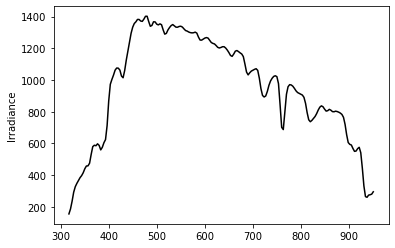

In [204]:
wvl_irr = [float(i) for i in data_test["307.13184939592"][:-2].tolist()]  
data_irr =  [float(i) for i in data_test["-NAN"][:-2].tolist()]  

plt.plot(wvl_irr, data_irr, "k-")
plt.ylabel("Irradiance")

# Read irradiance data for InAir measurements

In [322]:
Path_Air = "/isipd/projects/p_ESACCIARCTICOM/_others/2022_06_PedroFreitas/_data_Schwielowsee_20220628/InAir/"

# create empty lists for data, pressure, and datetimes
data_irr_coll = []
Pressure_coll = []
DateTime_coll = []

#iteratre through all files om "InAir" folder
for filename in os.listdir(Path_Air):
    if filename.startswith("SAMIP_50D1_Spectrum_Calibrated"):
        #print(filename)
        data_Header = pd.read_csv(Path_Air + filename, sep="= ")
        data = pd.read_csv(Path_Air + filename, sep=" ", skiprows=46)
        #Pressure = float(data_Header["[Spectrum]"][34])
        DateTime = data_Header["[Spectrum]"][7]
        Datetime_obj = datetime.strptime(DateTime, '%Y-%m-%d %H:%M:%S')
        #Incl1 = float(data_Header["[Spectrum]"][26])
        #Incl2 = float(data_Header["[Spectrum]"][27])
        #Incl3 = float(data_Header["[Spectrum]"][24])
        #Incl = np.arctan(np.sqrt(np.tan(Incl1)**2+np.tan(Incl2)**2))
        #print(Incl1, Incl2, Incl3, Incl)
        wvl_irr = [float(i) for i in data["0"][:-2].tolist()]  
        data_irr =  [float(i) for i in data["3"][:-2].tolist()]  
        
        # Append data
        data_irr_coll.append(data_irr)
        Pressure_coll.append(Pressure_coll)
        DateTime_coll.append(Datetime_obj)

# Plot irradiance over time

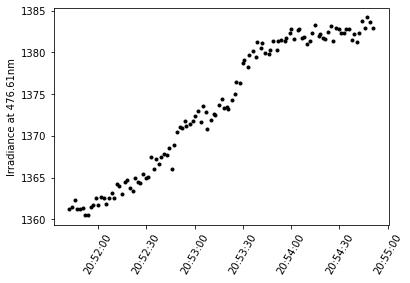

In [223]:
plt.plot(DateTime_coll, np.array(data_irr_coll)[:,50], "k.")
plt.ylabel("Irradiance at " + str(round(wvl_irr[50], 2)) + "nm")

plt.xticks(rotation=60)

plt.show()

# Plot min, mean, max spectra for entire period

Text(0, 0.5, 'Irradiance')

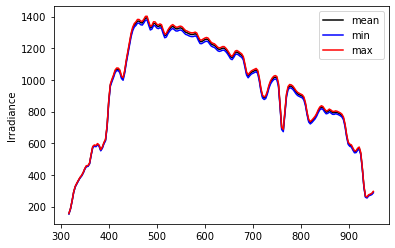

In [216]:
plt.plot(wvl_irr, np.nanmean(data_irr_coll, axis=0), "k-", label="mean")
plt.plot(wvl_irr, np.nanmin(data_irr_coll, axis=0), "b-", label="min")
plt.plot(wvl_irr, np.nanmax(data_irr_coll, axis=0), "r-", label="max")
plt.legend()
plt.ylabel("Irradiance")

# Read InWater Profile 1

In [323]:
Path_Water_Prof1 = "/isipd/projects/p_ESACCIARCTICOM/_others/2022_06_PedroFreitas/_data_Schwielowsee_20220628/InWater/Prof1/"

Prof1_data_irr_coll = []
Prof1_Pressure_coll = []
Prof1_DateTime_coll = []
Prof1_incl_coll = []

for filename in os.listdir(Path_Water_Prof1):
    if filename.startswith("SAMIP_50D1_Spectrum_Calibrated"):
        #print(filename)
        data_Header = pd.read_csv(Path_Water_Prof1 + filename, sep="= ")
        data = pd.read_csv(Path_Water_Prof1 + filename, sep=" ", skiprows=47)
        Pressure = float(data_Header["[Spectrum]"][34])
        DateTime = data_Header["[Spectrum]"][7]
        Datetime_obj = datetime.strptime(DateTime, '%Y-%m-%d %H:%M:%S')
        #Incl1 = float(data_Header["[Spectrum]"][26])
        #Incl2 = float(data_Header["[Spectrum]"][27])
        Incl = float(data_Header["[Spectrum]"][24])
        #Incl = np.arctan(np.sqrt(np.tan(Incl1)**2+np.tan(Incl2)**2))
        #print(Incl1, Incl2, Incl)
        wvl_irr = [float(i) for i in data["307.13184939592"][:-2].tolist()]  
        data_irr =  [float(i) for i in data["-NAN"][:-2].tolist()]

        Prof1_data_irr_coll.append(data_irr)
        Prof1_Pressure_coll.append(Pressure)
        Prof1_DateTime_coll.append(Datetime_obj)
        Prof1_incl_coll.append(Incl)

# InWater Profile 1

## Plot Irradiance of InWater Profile 1 over time for a selected wvl

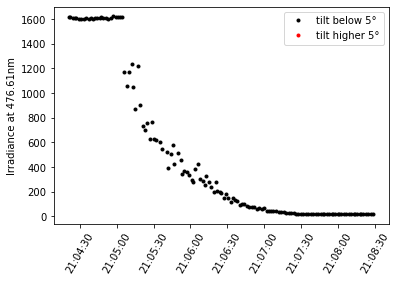

In [337]:
plt.plot(Prof1_DateTime_coll, np.array(Prof1_data_irr_coll)[:,50], "k.", label= "tilt below 5°")
plt.plot(Prof1_DateTime_coll, np.where(abs(np.array(Prof1_incl_coll))>5, np.array(Prof1_data_irr_coll)[:,50], np.nan), "r.", label="tilt higher 5°")
plt.ylabel("Irradiance at " + str(round(wvl_irr[50], 2)) + "nm")
plt.xticks(rotation=60)
plt.legend()
plt.show()

## Plot irradiance over depth

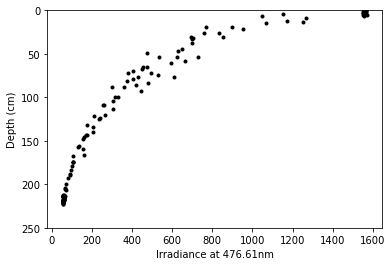

In [226]:
plt.plot(x, y, "k.")
plt.ylim(250,0)
plt.ylabel("Depth (cm)")
plt.xlabel("Irradiance at " + str(round(wvl_irr[50], 2)) + "nm")

plt.show()

## Plot in "log" and find linear regression model to retrieve irradiance at depth=0

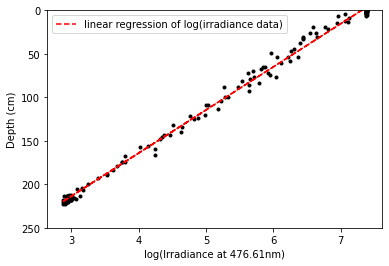

log-Irradiance at 476.61: 7.302321038834396
Irradiance at 476.61: 1483.7397516413748


In [236]:

x = np.array(Prof1_data_irr_coll)[:,50]
log_x = np.log(np.array(Prof1_data_irr_coll)[:,50])
y = np.array(Prof1_Pressure_coll) *1000

poly_fit = np.polyfit(log_x, y, 1)
fit_fn = np.poly1d(poly_fit)

poly_fit1 = np.polyfit(y, log_x, 1)
fit_fn1 = np.poly1d(poly_fit1)

plt.plot( log_x,y, "k.")

plt.ylim(250,0)
plt.plot(log_x, fit_fn(log_x), "r--", label="linear regression of log(irradiance data)") 

plt.xlabel("log(Irradiance at " + str(round(wvl_irr[50], 2)) + "nm)")
plt.ylabel("Depth (cm)")

plt.legend()

plt.show()

print("log-Irradiance at " + str(round(wvl_irr[50], 2)) + ": " + str(fit_fn1(0)))
print("Irradiance at " + str(round(wvl_irr[50], 2)) + ": " + str(np.exp(fit_fn1(0))))

In [ ]:
## iterature through all wvls to find irradiances at z=0 (Irradiance_z0)

In [291]:
Irradiance_z0 = []
for o, w in enumerate(np.array(Prof1_data_irr_coll)[0,:]):
    #print(o)
    try:
        x = np.array(Prof1_data_irr_coll)[:,o]
        log_x = np.log(np.array(Prof1_data_irr_coll)[:,o])
        y = np.array(Prof1_Pressure_coll) *1000

        poly_fit1 = np.polyfit(y, log_x, 1)
        fit_fn1 = np.poly1d(poly_fit1)
        Irradiance_z0.append(np.exp(fit_fn1(0)))
    except:
        Irradiance_z0.append(np.nan)
        pass

In [ ]:
## Plot Irradiance Spectra at z=0-

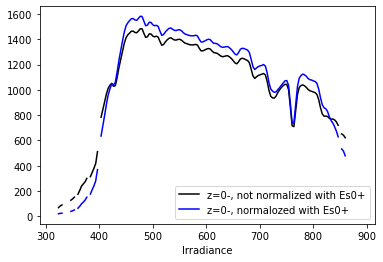

In [344]:
plt.plot(wvl_irr[:], Irradiance_z0, "k-", label="z=0-, not normalized with Es0+")
plt.plot(wvl_irr[:], np.array(Irradiance_z0) * (np.array(Irradiance_z0)/np.nanmean(data_irr_coll, axis=0)[1:]), "b-", label="z=0-, normalozed with Es0+")
plt.xlabel("Irradiance")
plt.legend()

plt.show()

Text(0, 0.5, 'wvls of irradiance sensor')

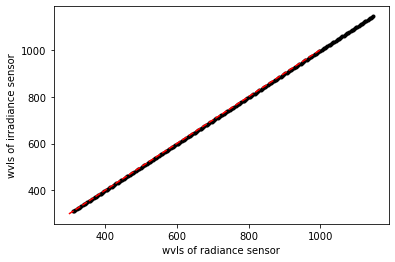

In [348]:
plt.plot(wvl_rad, wvl_irr, "k.")
plt.plot(np.arange(300,1000), np.arange(300,1000), "r--")

plt.xlabel("wvls of radiance sensor")
plt.ylabel("wvls of irradiance sensor")

## Read Radiance data

In [238]:
Path_Air = "/isipd/projects/p_ESACCIARCTICOM/_others/2022_06_PedroFreitas/_data_Schwielowsee_20220628/InWater/Prof1/"

Prof1_data_rad_coll = []
Prof1_rad_DateTime_coll = []
for filename in os.listdir(Path_Air):
    if filename.startswith("SAM_86EE_Spectrum_Calibrated"):
        #print(filename)
        data_Header = pd.read_csv(Path_Air + filename, sep="= ")
        data = pd.read_csv(Path_Air + filename, sep=" ", skiprows=41)
        #Pressure = float(data_Header["[Spectrum]"][34])
        DateTime = data_Header["[Spectrum]"][7]
        Datetime_obj = datetime.strptime(DateTime, '%Y-%m-%d %H:%M:%S')
        #Incl = float(data_Header["[Spectrum]"][24])
        wvl_rad = [float(i) for i in data["308.26654525832"][:-2].tolist()]  
        data_irr =  [float(i) for i in data["-NAN"][:-2].tolist()]  
        
        Prof1_data_rad_coll.append(data_irr)
        Prof1_rad_DateTime_coll.append(Datetime_obj)

## Plot Radiance of InWater Profile 1 over time for a selected wvlo

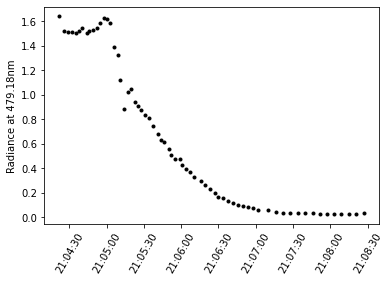

In [239]:
plt.plot(Prof1_rad_DateTime_coll, np.array(Prof1_data_rad_coll)[:,50], "k.")
plt.ylabel("Radiance at " + str(round(wvl_rad[50], 2)) + "nm")
plt.xticks(rotation=60)

plt.show()

## Get Pressure for Radiance

Since the radiance sensor has no pressure/depth sensor, we use the information from the irradiance sensor.
For that we find for each radiance spectra and the closest match in time within all irradiance measurements. Then we take the pressure/depth of the matach from the irradiance sensor

In [195]:
Pressure_radiance=[]
for i, e in enumerate(Prof1_rad_DateTime_coll):
    print(e)
    near = nearest( Prof1_DateTime_coll, e)
    print("Nearest: " + str(near))
    index = Prof1_DateTime_coll.index(near)
    Pressure = Prof1_Pressure_coll[index]
    Pressure_radiance.append(Pressure)

2022-06-28 21:06:54
Nearest: 2022-06-28 21:06:54
2022-06-28 21:04:26
Nearest: 2022-06-28 21:04:26
2022-06-28 21:04:44
Nearest: 2022-06-28 21:04:44
2022-06-28 21:06:30
Nearest: 2022-06-28 21:06:29
2022-06-28 21:06:04
Nearest: 2022-06-28 21:06:04
2022-06-28 21:04:58
Nearest: 2022-06-28 21:04:59
2022-06-28 21:06:38
Nearest: 2022-06-28 21:06:38
2022-06-28 21:05:17
Nearest: 2022-06-28 21:05:17
2022-06-28 21:08:03
Nearest: 2022-06-28 21:08:03
2022-06-28 21:07:16
Nearest: 2022-06-28 21:07:16
2022-06-28 21:05:23
Nearest: 2022-06-28 21:05:23
2022-06-28 21:06:16
Nearest: 2022-06-28 21:06:15
2022-06-28 21:06:34
Nearest: 2022-06-28 21:06:33
2022-06-28 21:06:46
Nearest: 2022-06-28 21:06:46
2022-06-28 21:04:55
Nearest: 2022-06-28 21:04:55
2022-06-28 21:04:49
Nearest: 2022-06-28 21:04:49
2022-06-28 21:05:25
Nearest: 2022-06-28 21:05:25
2022-06-28 21:06:58
Nearest: 2022-06-28 21:06:58
2022-06-28 21:04:46
Nearest: 2022-06-28 21:04:46
2022-06-28 21:05:44
Nearest: 2022-06-28 21:05:44
2022-06-28 21:05:11


(250.0, 0.0)

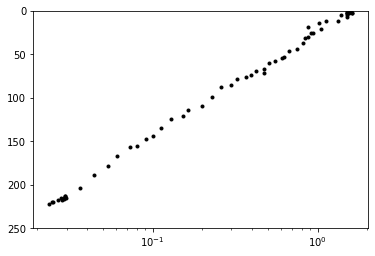

In [179]:
plt.semilogx(np.array(Prof1_data_rad_coll)[:,50], np.array(Pressure_radiance) * 1000, "k.")
plt.ylim(250, 0)

1417.6234623917458


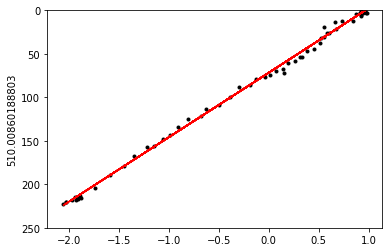

In [183]:
log_x = np.log(np.array(Prof1_data_rad_coll)[:,60])
y = np.array(Pressure_radiance) *1000

poly_fit = np.polyfit(log_x, y, 1)
fit_fn = np.poly1d(poly_fit)


plt.plot( log_x,y, "k.")

plt.ylim(250,0)
plt.ylabel(wvl_irr[60])

plt.plot(log_x, fit_fn(log_x), "r--") 

print(np.exp(fit_fn1(0)))

## iterature through all wvls to get radiance at z=0-

In [296]:
Radiance_z0 = []
for o, w in enumerate(np.array(Prof1_data_rad_coll)[0,:]):
    #print(o)
    try:
        x = np.array(Prof1_data_rad_coll)[:,o]
        log_x = np.log(np.array(Prof1_data_rad_coll)[:,o])
        y = np.array(Pressure_radiance) *1000

        poly_fit1 = np.polyfit(y, log_x, 1)
        fit_fn1 = np.poly1d(poly_fit1)
        Radiance_z0.append(np.exp(fit_fn1(0)))
    except:
        Radiance_z0.append(np.nan)
        pass

## Plot Radiance spectra at z=0-

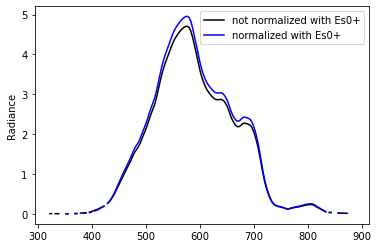

In [349]:
plt.plot(wvl_rad[:], Radiance_z0, "k-", label="not normalized with Es0+")
plt.plot(wvl_rad[:], np.array(Radiance_z0)* (np.array(Irradiance_z0)/np.nanmean(data_irr_coll, axis=0)[1:]), "b-", label="normalized with Es0+")

plt.ylabel("Radiance")
plt.legend()



# Plot Remote Sening Reflectnace
Rrs = 0.543 x Lu / Ed

0.543 --> Transfer from below to above the water surface

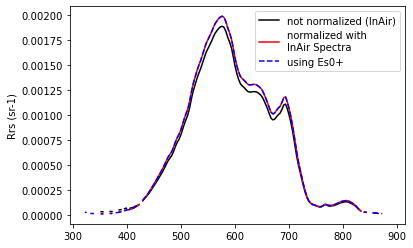

In [360]:
plt.plot(wvl_rad, (0.543*np.array(Radiance_z0))/np.array(Irradiance_z0) , "k-", label="not normalized (InAir)")
plt.plot(wvl_rad, (0.543*np.array(Radiance_z0))/np.array(Irradiance_z0) * (np.array(Irradiance_z0)/np.nanmean(data_irr_coll, axis=0)[1:]) , "r-", label="normalized with\nInAir Spectra")
plt.plot(wvl_rad, (0.543*np.array(Radiance_z0))/np.nanmean(data_irr_coll, axis=0)[1:] , "b--", label="using Es0+")

plt.ylabel("Rrs (sr-1)")
plt.legend()


## compare Ed0- and Es0+

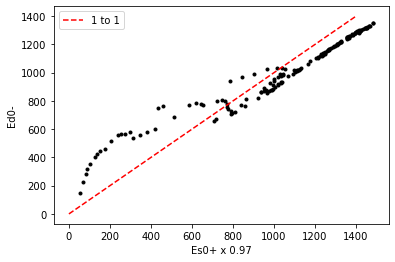

In [357]:
plt.plot(Irradiance_z0, np.nanmean(data_irr_coll, axis=0)[1:] * 0.97, "k.")
plt.plot(np.arange(0,1400), np.arange(0,1400), "r--", label="1 to 1")
plt.xlabel("Es0+ x 0.97")
plt.ylabel("Ed0-")
plt.legend()
plt.show()